## Overview
Machine learning is a powerful and expanding field within artifical intelligence. It has found applications throughout a variety of industries. At its core, <mark>machine learning is driven by algorithms and models that enable computers to learn and make predictions based on already available (test) data.</mark> Machine learning is utilized in today's world to predict disease outcomes, analyze medical images, detect fraud, predict market trends, and much more. Its ability to extract insights from complex datasets to make data driven decisions enhances efficiency, unlocks otherwise hidden patterns, and make predictions that have been impossible in the past...

### The Machine Learning Process

![image](https://github.com/nighthawkcoders/teacher/assets/111611921/b95651cf-21e1-4328-8269-5b768b459ed9)


## Data Sample
Below is fitbit data detailing 20 workouts, their duration, my heartbeat, workout type, and the resulting calories I burnt. As an athlete I want to maximize the amount of calories I burn, so I can optimize my workouts. However, due to the various factors involved in burning calories, the best way to achieve my goal is a machine learning model. 

In [1]:
Duration (minutes) | Heart Rate (bpm) | Intensity Level | Calories Burned
------------------------------------------------------------------------
30                | 120              | 3               | 200
45                | 140              | 6               | 300
60                | 160              | 9               | 400
20                | 110              | 2               | 150
35                | 130              | 5               | 250
50                | 150              | 8               | 350
25                | 125              | 4               | 180
40                | 145              | 7               | 280
55                | 165              | 10              | 410
30                | 120              | 3               | 210
45                | 140              | 6               | 320
60                | 160              | 9               | 390
20                | 110              | 2               | 160
35                | 130              | 5               | 240
50                | 150              | 8               | 360
25                | 125              | 4               | 170
40                | 145              | 7               | 270
55                | 165              | 10              | 400
30                | 120              | 3               | 220
45                | 140              | 6               | 310

SyntaxError: invalid syntax (230195421.py, line 1)

## Data Preprocessing
Given the fitness dataset, we first establish the following variables: 
Dependent Variable:
* Calories Burned 

Independent Variables: 
* Duration : length of the workout in minutes
* Heart Rate : average rate of heart beat in beats per minute during the workout
* Intensity level : Workout intensity level from a scale of 1 (sitting) to 10 (sprinting)
> These independent variables were chosen for this model because they are believed to be the most relevant factors affecting calories burned.

The dependent variable, Calories Burned, is the target variable the model will aim to predict. It represents the amount of calories burned during a specific fitness activity. The Independent variables will be the inputs used to predict the dependent variable using a linear regression model. The linear regression model will analyze the relationship between the independent and dependent variables in order to create accurate predictions. This can be done easily using the scikit-learn library in Python. See installation instructions [here](https://scikit-learn.org/stable/install.html). You will also need pandas. 

### Variable Relationship Visualization 
These visualizations are meant to show the relationship between the independent variables and dependent variable (target calories burnt)

> pip install matplotlib

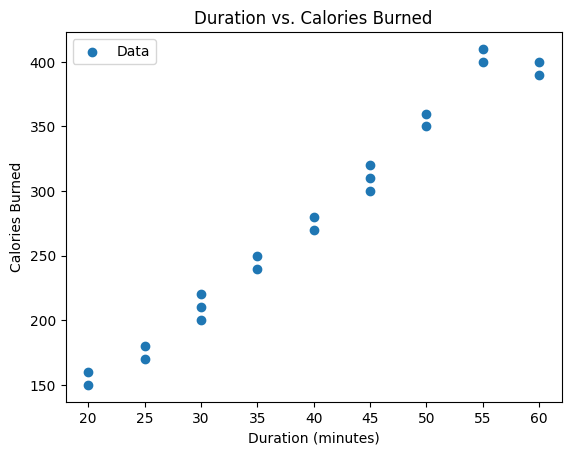

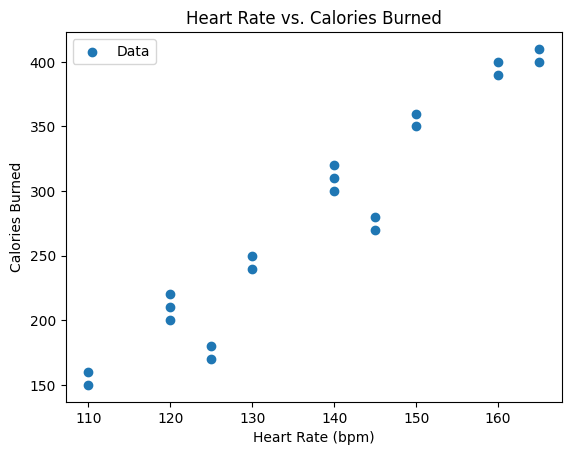

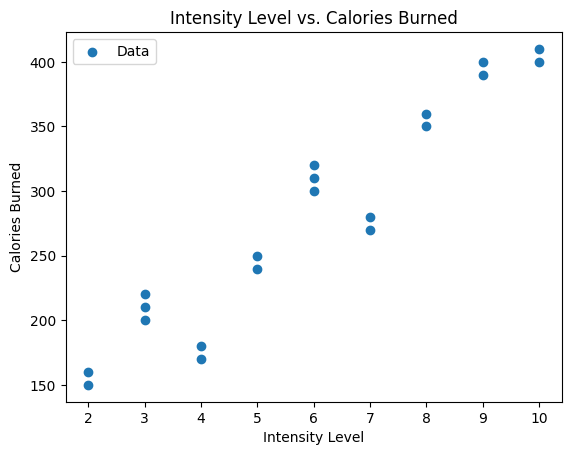

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the fitness dataset into a pandas DataFrame
data = pd.DataFrame({
    'Duration': [30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45],
    'Heart Rate': [120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140],
    'Intensity Level': [3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6],
    'Calories Burned': [200, 300, 400, 150, 250, 350, 180, 280, 410, 210, 320, 390, 160, 240, 360, 170, 270, 400, 220, 310]
})

#Duration vs. Calories Burned
plt.scatter(data['Duration'], data['Calories Burned'], label='Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.title('Duration vs. Calories Burned')
plt.legend()
plt.show()

#Heart Rate vs. Calories Burned
plt.scatter(data['Heart Rate'], data['Calories Burned'], label='Data')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories Burned')
plt.title('Heart Rate vs. Calories Burned')
plt.legend()
plt.show()

# Intensity Level vs. Calories Burned
plt.scatter(data['Intensity Level'], data['Calories Burned'], label='Data')
plt.xlabel('Intensity Level')
plt.ylabel('Calories Burned')
plt.title('Intensity Level vs. Calories Burned')
plt.legend()
plt.show()

### Splitting the Data
This dataset includes 15 rows of TRAIN fitbit data and 5 rows of TEST data, with various combinations of duration, heart rate, workout type, and the corresponding calories burned. The trained machine learning model will make predictions on new, unseen instances and compare them with the actual calories burned values. 

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the fitness dataset into a pandas DataFrame
data = pd.DataFrame({
    'Duration': [30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45],
    'Heart Rate': [120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140],
    'Intensity Level': [3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6],
    'Calories Burned': [200, 300, 400, 150, 250, 350, 180, 280, 410, 210, 320, 390, 160, 240, 360, 170, 270, 400, 220, 310]
})

# Split the dataset
train_data, test_data = train_test_split(data, test_size=5, random_state=42)

# Print training data
print("Training Data:")
print(train_data)

# Print test data
print("\nTest Data:")
print(test_data)

Training Data:
    Duration  Heart Rate  Intensity Level  Calories Burned
5         50         150                8              350
11        60         160                9              390
3         20         110                2              150
18        30         120                3              220
16        40         145                7              270
13        35         130                5              240
2         60         160                9              400
9         30         120                3              210
19        45         140                6              310
4         35         130                5              250
12        20         110                2              160
7         40         145                7              280
10        45         140                6              320
14        50         150                8              360
6         25         125                4              180

Test Data:
    Duration  Heart Rate  Int

## Model Training and Evaluation 

In this code, we start by loading the fitness dataset into a pandas DataFrame. Then, we split the dataset into training and test data using train_test_split (just as before). We assign the independent variables (Duration, Heart Rate, Intensity Level) and the dependent variable (Calories Burned) to separate variables for both the training and test data.

Next, we create a linear regression model using LinearRegression(). We fit the model to the training data by calling fit and passing in the training features and target variables (X_train and y_train).

After fitting the model, we use it to make predictions on the test data by calling predict and passing in the test features (X_test). The predicted values are stored in y_pred. This way we can test the accuracy of the model with real data. 

Finally, we calculate the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_pred) using the mean_squared_error function from scikit-learn. The MSE provides a measure of the average squared difference between the predicted and actual values. It is a measure of how well the model performs on the test data, where lower value indicates a better performance. We print the calculated MSE to evaluate the performance of the model.

In summary, this code demonstrates the process of splitting the dataset into training and test data, creating a linear regression model, fitting it, and then calculating the margin of error in testing.

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the fitness dataset into a pandas DataFrame
data = pd.DataFrame({
    'Duration': [30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45],
    'Heart Rate': [120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140],
    'Intensity Level': [3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6],
    'Calories Burned': [200, 300, 400, 150, 250, 350, 180, 280, 410, 210, 320, 390, 160, 240, 360, 170, 270, 400, 220, 310]
})

# Split the dataset into training and test data
train_data, test_data = train_test_split(data, test_size=5, random_state=42)

# Separate the features (X) and the target variable (y) for training and test data
X_train = train_data[['Duration', 'Heart Rate', 'Intensity Level']]
y_train = train_data['Calories Burned']
X_test = test_data[['Duration', 'Heart Rate', 'Intensity Level']]
y_test = test_data['Calories Burned']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 569.4444444444464


## Model Testing and Interpretation 

The mean squared error represents the inaccuracy of the model. A mean squared error of 569.444 indicates that the model is quite inaccurate. In general this can be fixed through a few ways: 
1. Feature Engineering: Exploring other relevant factors to the variable "calories burned". This may be even categorical like activity type. This would require changing your original dataset. 
2. Data Cleaning: Reviewing the database for missing data, outliers, or inconsistent data.This would also require changing your original dataset. 
3. Feature Scaling: Normalize the data so they are on a similar numerical scale. For example, calories burned is on a quite larger scale than intensity level. (up to 410 for calories versus up to 10 for intensity)

**4. Regularization: IMPORTANT CONCEPT** ~ This is a method to prevent overfitting, which is essentially when the model "memorizes" data rather than associating. Think of it like this.. Say you are trying to study for a math test. You could go about it two ways: The first option is that you memorize all of the answers on your homework to a T. The other option is to take time to understand the concept so you are prepared for whatever may come your way on the test. Which would you choose? You probably said it is a better idea to choose the second option. If you chose the first option and saw something unfamiliar on the test, you would have no idea how to answer it! In this way, overfitting data is similar to option 1 (memorization). You do not want your model to be over-trained, or overfitted because it must be able to respond to a variety of data rather than just 'memorize' the test data. 

**Changes Made**: 

Polynomial Features: 
- Polynomial features are created using 'PolynomialFeatures' from scikit-learn.
- The degree determines the maximum power to which each independent can be raised to. The degree=2, is an arbritary number. It depends on many factors like the complexity of the model, etc. but for simplcity it is customary to start at around 1-2 and then incrementally increase the degree, and reevaluate the models performance at each step. 
- By introducing polynomial features, the model can model non-linear relationships between the independent variables and the target variable. This flexibility allows the model to fit more complex patterns in the data and reduce the MSE.
- Also this may indirectly affect the feature scaling, but it is not the primary purpose

Ridge Regression:
- Ridge regression is utilized using 'Ridge' from scikit-learn. It is a **regularization** technique. Essentially, every variable is given a 'weight' in how much it contributes to the end prediction. For example, the intensity level may have a higher weight, or impact on the calorie loss compared to duration of the workout. Ridge regression basically encourages the model to have smaller weights for each feature so the model doesn't overfit or memorize as explained earlier. This controls the model's complexity and again avoids overfitting.
- By adding a small positive alpha (alpha=0.1 in this case), the model's coefficients, or weights are penalized. This regularization helps reduce the impact of irrelevant features and prevents overfitting. 

Pipeline:
- A pipeline is constructed using make_pipeline from scikit-learn. In simple terms: It combines multiple preprocessing  steps into a single one 
- Using a pipeline allows for a more streamlined and concise implementation. It ensures that the transformations(mentioned above) are applied consistently to both the training and test data.
- This is not an actual modification to the data/methods used

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Load the fitness dataset into a pandas DataFrame
data = pd.DataFrame({
    'Duration': [30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45, 60, 20, 35, 50, 25, 40, 55, 30, 45],
    'Heart Rate': [120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140, 160, 110, 130, 150, 125, 145, 165, 120, 140],
    'Intensity Level': [3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6, 9, 2, 5, 8, 4, 7, 10, 3, 6],
    'Calories Burned': [200, 300, 400, 150, 250, 350, 180, 280, 410, 210, 320, 390, 160, 240, 360, 170, 270, 400, 220, 310]
})

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(data[['Duration', 'Heart Rate', 'Intensity Level']], data['Calories Burned'], test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1)) 

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 108.33239800289937


As you can see, the MSE (the inaccuracy) decreased significantly after the last change. I suggest you 

## Interactive Model Testing
The code below will run in terminal. It is an interactive model, where the user can enter their workout duration, heart rate, intensity level. They will recieve a prediction or estimate created by the linear regression model on number of calories burned. The user can input the actual number of calories burned to recieve an accuracy. 

Test Data: 
- Duration (minutes): 30 
- Heart Rate (bpm) : 140 
- Intensity Level: 6
- Actual Calories Loss: 140

In [30]:
from sklearn.linear_model import LinearRegression

def calculate_estimate():
    duration = float(input("Enter Duration (minutes): "))
    heart_rate = float(input("Enter Heart Rate (bpm): "))
    intensity_level = float(input("Enter Intensity Level: "))

    # Make a prediction using the user input
    prediction = model.predict([[duration, heart_rate, intensity_level]])

    print("Duration:",duration)
    print("Heart Rate:",heart_rate)
    print("Intensity Level:",intensity_level)
    print("Calorie Loss Estimate:", prediction[0])

    actual_calories_burned = float(input("Enter Actual Calories Burned: "))
    print("Actual Calories Loss:", actual_calories_burned)
    percent_accuracy = 100 * (1 - abs(prediction[0] - actual_calories_burned) / actual_calories_burned)
    print("Percent Accuracy: {:.2f}%".format(percent_accuracy))

# Prompt user for input and calculate estimate
calculate_estimate()

/home/tanisha1234/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Duration: 20.0
Heart Rate: 140.0
Intensity Level: 6.0
Calorie Loss Estimate: 156.1542610571737
Actual Calories Loss: 140.0
Percent Accuracy: 88.46%


## Hacks 
1. Build a proper web frontend for this (or your own) regression model. (Machine learning can be a complicated concept...How can you make a simple UI to present the model to the user in an efficient way?)
2. Use real test cases on this model (Collect data from a real group of people - a sports team for example- and see if the calorie loss prediction is actually accurate. If the model is innacurate, what are some ways we discussed in the lesson to reduce innacuracy? Try implementing those ways!)
3. Add more components/independen variables to compliment the model. (How can you incorporate something like categorical- non numerical- data for example? What would this entail? Will adding more numerical categories increase the models accuracy.. or just overcomplicate it? Test these things on your own!)
4. For the math inclined people - try explaining the Math used in the sklearn learning models. Mathematically describe how these predefined methods (such as model.fit) really work.
5. Try a new machine learning model (decision tree regression, random forest)
6. Try to find the most important feature (independent variable) to determining calorie loss. (Try comparing coefficients, etc - this may require some more research)

## Conclusion and Further Exploration 
This lesson introduced the concept of using machine learning, specifically linear regression, to estimate calorie loss during fitness activities. This lesson explored how independent variables such as duration, heart rate, and intensity level can be used to predict the dependent variable, calories burned even when the model is non-linear. 

*Further Exploration:*
Here are some videos to watch to learn more about this topic. Researching on your own is HIGHLY encouraged! 
- A very simple explanation of what multivariable regression is (includes a graphical and mathematical perspective which may appeal to some students) : https://www.youtube.com/watch?v=SZ--3sUoNmY
- Walkthrough of using sklearn in python for multivariable regression: https://www.youtube.com/watch?v=KYNuzfn5Fx0
- Explains underfitting, overfitting perfectly and gives suggestions! : https://www.youtube.com/watch?v=o3DztvnfAJg


To further your understanding of machine learning and regression models, here are some suggestions:

- Try Different Models: Experiment with other regression models such as decision trees, random forests,K nearest neighboors, and compare their performance to the linear regression model. Analyze the strengths and weaknesses of different models for this specific calorie loss estimation task. Different models are beneficial for their own reasons, it is important to learn how to weigh their pros and cons. 

- Data Collection and Preprocessing: Collect a different dataset related to fitness activities (or a topic of your choice) and create your own model using linear regression. Research in incorporating catogorical elements such as "activity type" rather than just numerical ones - this would be an interesting take. 

- Evaluation Metrics: Explore alternative evaluation metrics beyond mean squared error (MSE) for regression models. Consider metrics like mean absolute error (MAE) or R-squared to gain further insights into model performance.

Machine learning is vast, keep yourself updated! Continuously exploring and experimenting with different techniques, datasets, and evaluation metrics will deepen your proficiency in applying machine learning algorithms for various real-world scenarios.